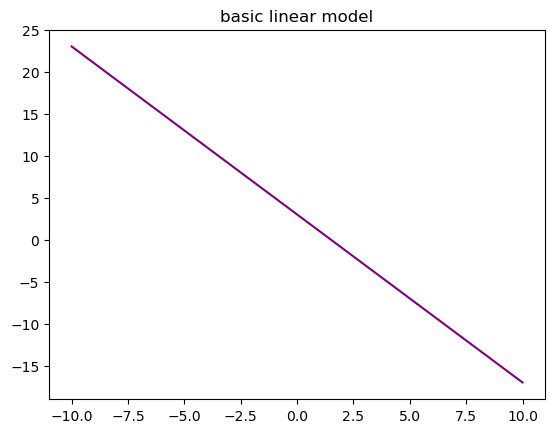

In [1]:
#这里需要导入numpy
import numpy as np
#再导入可视化工具matplotlib
import matplotlib.pyplot as plt
#生成一个-10到10之间，元素数为200的等差数列
x = np.linspace(-10,10,200)
#输入直线方程
y = -2*x + 3
#使用matplotlib绘制折线图
plt.plot(x,y,c='purple')
#图题设为“basic linear model”
plt.title('basic linear model')
#显示图像
plt.show()

In [4]:
#这里要用到pandas
import pandas as pd
#用字典数据类型存储两个学生的年龄和身高
data = {'Age' : [14,18],
       'Height' : [165,175]}
#把字典转换为pandas数据框
data_frame = pd.DataFrame(data)
#检查一下是否成功
data_frame.head()

,Age,Height
0,14,165
1,18,175


In [5]:
#导入线性回归模型
from sklearn.linear_model import LinearRegression
#创建一个回归器，所有参数保持默认
reg = LinearRegression()
#把样本的年龄赋值给x
x = data_frame['Age'].values.reshape(-1,1)
#样本身高赋值给y
y = data_frame['Height']
#使用x，y训练线形回归模型
reg.fit(x,y)

LinearRegression()

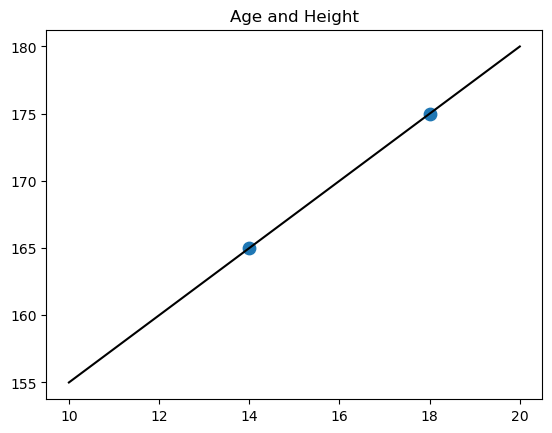

In [6]:
#令z为10-20之间的等差数列，元素数为20
z = np.linspace(10,20,20)
#将x和y用散点图的形式展现出来
plt.scatter(x,y,s=80)
#用直线绘制模型
plt.plot(z, reg.predict(z.reshape(-1,1)),c='k')
#设定图题为“Age and Height”
plt.title('Age and Height')
#显示图像
plt.show()

In [7]:
#打印模型中的coef_和intercept_属性
print(reg.coef_, reg.intercept_)

[2.5] 130.0


In [8]:
#用字典数据类型存储3个学生的年龄和身高
data2 = {'Age' : [14,16,18],
       'Height' : [165,166,175]}
#把字典转换为pandas数据框
data_frame2 = pd.DataFrame(data2)
#检查一下是否成功
data_frame2.head()

,Age,Height
0,14,165
1,16,166
2,18,175


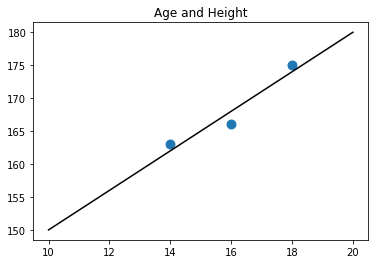

In [11]:
#再次定义一个回归器reg2
reg2 = LinearRegression()
#把样本的年龄赋值给x
x2 = data_frame2['Age'].values.reshape(-1,1)
#样本身高赋值给y
y2 = data_frame2['Height']
#使用x，y训练线形回归模型
reg2.fit(x2,y2)
#将x2和y2用散点图的形式展现出来
plt.scatter(x2,y2,s=80)
#用直线绘制模型，继续使用之前生成的等差数列z
plt.plot(z, reg2.predict(z.reshape(-1,1)),c='k')
#设定图题为“Age and Height”
plt.title('Age and Height')
#显示图像
plt.show()

In [12]:
#查看reg2的斜率与截距
print(reg2.coef_,reg2.intercept_)

[3.] 120.00000000000003


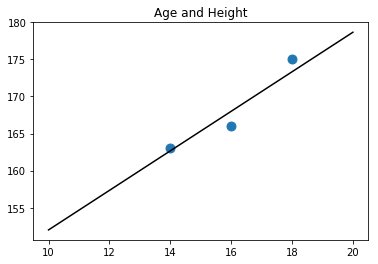

In [16]:
#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
ridge = Ridge().fit(x2, y2)
#将x2和y2用散点图的形式展现出来
plt.scatter(x2,y2,s=80)
#用直线绘制模型，继续使用之前生成的等差数列z
plt.plot(z, ridge.predict(z.reshape(-1,1)),c='k')
#设定图题为“Age and Height”
plt.title('Age and Height')
#显示图像
plt.show()

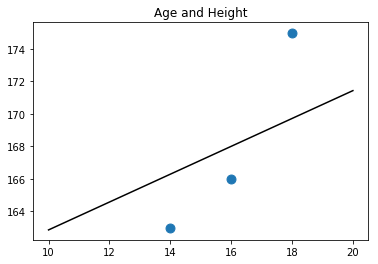

In [19]:
#使用alpha为20的岭回归对数据进行拟合
ridge2 = Ridge(alpha=20).fit(x2, y2)
#将x2和y2用散点图的形式展现出来
plt.scatter(x2,y2,s=80)
#用直线绘制模型，继续使用之前生成的等差数列z
plt.plot(z, ridge2.predict(z.reshape(-1,1)),c='k')
#设定图题为“Age and Height”
plt.title('Age and Height')
#显示图像
plt.show()

In [21]:
#查看ridge2的直线斜率与截距
print(ridge2.coef_, ridge2.intercept_)

[0.85714286] 154.28571428571428


In [25]:
#载入糖尿病情数据集
from sklearn.datasets import load_diabetes
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将样本特征与标签分别赋值给X，y
X, y = load_diabetes().data, load_diabetes().target
#将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
#查看拆分是否成功
X.shape, X_train.shape

((442, 10), (331, 10))

In [27]:
#使用alpha参数为0.1的岭回归进行训练
ridge = Ridge(alpha = 0.1).fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5215646055241339
0.47340195009453095


In [28]:
#设置岭回归的参数为5
ridge5 = Ridge(alpha = 5)
#使用训练集训练模型
ridge5.fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print(ridge5.score(X_train, y_train))
print(ridge5.score(X_test, y_test))

0.23603769215514647
0.25079436127855825


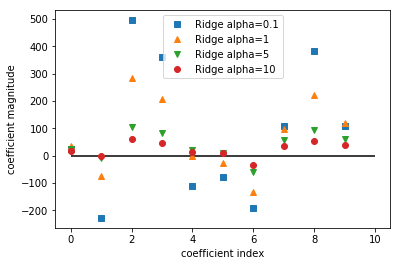

In [34]:
#训练4个不同alpha参数的岭回归，alpha值分别去0.1、1、5、10
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge1 = Ridge(alpha = 1).fit(X_train, y_train)
ridge5 = Ridge(alpha = 5).fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
#绘制alpha=0.1时的模型系数,
plt.plot(ridge01.coef_, 's', label = 'Ridge alpha=0.1')
#绘制alpha=1时的模型系数
plt.plot(ridge1.coef_, '^', label = 'Ridge alpha=1')
#绘制alpha=5时的模型系数
plt.plot(ridge5.coef_, 'v', label = 'Ridge alpha=5')
#绘制alpha=10时的模型系数
plt.plot(ridge10.coef_, 'o', label = 'Ridge alpha=10')
#设置图像横纵轴的标题
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
#绘制一条直线作为参考线
plt.hlines(0,0, len(ridge01.coef_))
#添加图注
plt.legend(loc = 'best')
#显示图像
plt.show()

In [35]:
#导入套索回归
from sklearn.linear_model import Lasso
#使用套索回归拟合数据
lasso = Lasso().fit(X_train, y_train)
#返回模型参数
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
#打印套索回归在训练集中的准确率
print(lasso.score(X_train, y_train))
#打印套索回归在验证集中的准确率
print(lasso.score(X_test, y_test))
#打印套索回归使用的特征数量
print(np.sum(lasso.coef_ != 0))

0.36242428249291325
0.36561858962128
3


In [38]:
#设置套索回归的alpha值为0.1，并拟合数据
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
#打印训练集中的准确率
print(lasso01.score(X_train, y_train))
#打印验证集中的准确率
print(lasso01.score(X_test, y_test))
#查看模型使用的特征数量
print(np.sum(lasso01.coef_ != 0))

0.519480608218357
0.47994757514558173
7


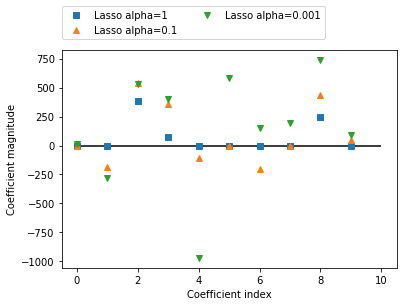

In [42]:
#设置套索回归的alpha值为0.001，并拟合数据
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
#绘制alpha值等于1时的模型系数
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
#绘制alpha值等于0.1时的模型系数
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
#绘制alpha值等于0.001时的模型系数
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.001")
#绘制一条直线作为参考线
plt.hlines(0,0, len(lasso.coef_))
#设置图注样式与位置
plt.legend(ncol=2,loc=(0,1.05))
#设置横纵轴标题
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
#显示图像
plt.show()